In [3]:
from keras.datasets import mnist
import tensorflow as tf
print(f'Current TensorFlow version: {tf.__version__}')

Current TensorFlow version: 1.10.0


# Obtaining mnist dataset and splits it into training and testing datasets

In [57]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# Looking at the datasets

Using .shape function to find the dimensions of an array

In [59]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28) means 60,000 arrays of 28 columns by 28 rows. Therefore, it is a 3 dimentional array.

Taking a look at the first index of x_train

In [60]:
single_image = x_train[0]

In [61]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Looking at image presentation of the first array of x_train by using imshow from matplot libarary

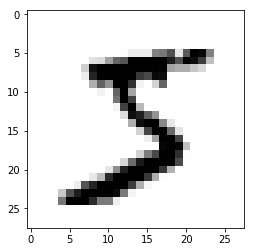

In [62]:
plt.imshow(single_image, cmap='gray_r')

# Looking at y_train dataset

In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Converting category of numbers 0-9 in to numeric form, which is an array of zeros except one for its category. Which called one hot encoding

In [64]:
from keras.utils.np_utils import to_categorical

In [65]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

Verify one hot encoding

In [66]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [67]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [68]:
y_cat_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Scale the input data from 0 to 1

In [69]:
single_image.max()

255

In [70]:
x_train = x_train / x_train.max()

In [71]:
x_test = x_test / x_test.max()

In [72]:
x_train[0].max()

1.0

In [73]:
x_train[0].min()

0.0

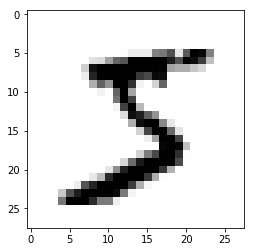

In [22]:
plt.imshow(single_image, cmap='gray_r')


# Reshape with color channel

In [38]:
x_train.shape

(60000, 28, 28)

Specify a single channel by .reshape()

In [74]:
x_train = x_train.reshape(60000,28,28,1)

In [75]:
x_train.shape

(60000, 28, 28, 1)

In [76]:
x_test.shape

(10000, 28, 28)

In [77]:
x_test = x_test.reshape(10000,28,28,1)

In [78]:
x_test.shape

(10000, 28, 28, 1)

# Training the model

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [80]:
model = Sequential()

#Convu Layer
model.add(Conv2D(filters=32, kernel_size= (4,4), input_shape=(28,28,1), activation='relu'))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Transform to single layer can understand
model.add(Flatten())

#Add dense layer
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [81]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 29s 476us/step - loss: 0.1351 - acc: 0.9590
Epoch 2/2
60000/60000 [==============================] - 31s 516us/step - loss: 0.0479 - acc: 0.9857


In [83]:
model.metrics_names

['loss', 'acc']

In [84]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 1s 102us/step


[0.04028113796112011, 0.9873]

# Predict x-test

In [85]:
from sklearn.metrics import classification_report

In [86]:
predictions = model.predict_classes(x_test)

In [87]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Compares y_test with predictions

In [88]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.98      0.98      0.98       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000

